# Creating basic market report using pyhton

In [1]:
# Install FPDF programme to convert python scripts into pdf scripts
!pip install FPDF

In [2]:
# Import relevant database to generate the input for your project, these are the commonly used repository
import numpy as np
import pandas as pd
from fpdf import FPDF
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import financial data, Yfinance is a good repository if you do not have it
!pip install yfinance
!pip install yahoofinancials

In [4]:
import yfinance as yf
from yahoofinancials import YahooFinancials
# Load historical data in the past 1 year
AAPL = yf.Ticker("AAPL")
end_date = pd.Timestamp.today()
start_date = end_date - pd.Timedelta(days=365)
AAPL_history=AAPL.history(start=start_date, end=end_date)

# Remove unnecessary columns
AAPL_history = AAPL_history.drop(columns=['Dividends', 'Stock Splits'])

# Create a summary statistics table
AAPL_history_summary = AAPL_history.describe()

In [5]:
SPY = yf.Ticker("SPY")
end_date = pd.Timestamp.today()
start_date = end_date - pd.Timedelta(days=365)
SPY_history=SPY.history(start=start_date, end=end_date)

# Remove unnecessary columns
SPY_history = SPY_history.drop(columns=['Dividends', 'Stock Splits'])

# Create a summary statistics table
SPY_history_summary = SPY_history.describe()

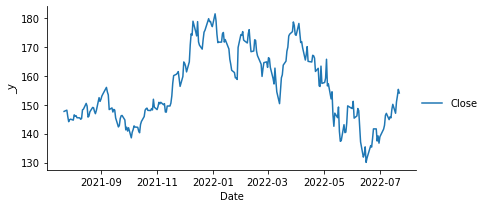

In [6]:
# Creating Apple chart
sns.relplot(data=AAPL_history[['Close']], kind='line', height=3, aspect=2.0)
plt.savefig('AAPLchart.png')

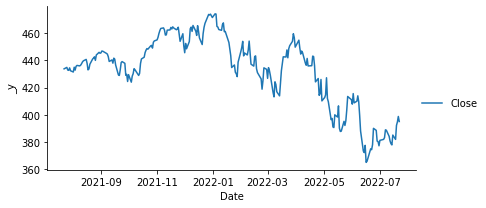

In [7]:
# Creating SPY chart
sns.relplot(data=SPY_history[['Close']], kind='line', height=3, aspect=2.0)
plt.savefig('SPYchart.png')

In [8]:
def output_df_to_pdf(pdf, df):
    # A cell is a rectangular area, possibly framed, which contains some text
    # Set the width and height of cell
    table_cell_width = 25
    table_cell_height = 6
    # Select a font as Arial, bold, 8
    pdf.set_font('Arial', 'B', 8)
    
    # Loop over to print column names
    cols = df.columns
    for col in cols:
        pdf.cell(table_cell_width, table_cell_height, col, align='C', border=1)
    # Line break
    pdf.ln(table_cell_height)
    # Select a font as Arial, regular, 10
    pdf.set_font('Arial', '', 10)
    # Loop over to print each data in the table
    for row in df.itertuples():
        for col in cols:
            value = str(getattr(row, col))
            pdf.cell(table_cell_width, table_cell_height, value, align='C', border=1)
        pdf.ln(table_cell_height)

In [9]:
# FPDF package https://pyfpdf.readthedocs.io/en/latest/Tutorial/index.html#minimal-example
from fpdf import FPDF

# 1. Set up the PDF doc basics
pdf = FPDF(orientation = 'P', unit = 'mm', format = 'A4')
pdf.add_page()
pdf.set_font('Arial',"", 12)

# 2. Layout the PDF doc contents
## Title
pdf.cell(40, 12, 'This PDF File is generate through python script for the purpose to automating daily reports.')
pdf.ln(20)
pdf.cell(40, 12, 'SPY Price chart')
## for line Line breaks with a height of 20
pdf.ln(20)
## Image
pdf.image('SPYchart.png')

## for line Line breaks with a height of 20
pdf.ln(20)

## Show table of historical summary data
SPY_history_summary_pdf = SPY_history_summary.reset_index()
numeric_cols = SPY_history_summary_pdf.select_dtypes(include='number').columns
SPY_history_summary_pdf[numeric_cols] = SPY_history_summary_pdf[numeric_cols].round(2)
output_df_to_pdf(pdf, SPY_history_summary_pdf)

pdf.ln(100)
## Title
pdf.cell(40, 12, 'AAPL Price chart')
## for line Line breaks with a height of 20
pdf.ln(20)
## Image
pdf.image('AAPLchart.png')
## for line Line breaks with a height of 20
pdf.ln(20)
## Show table of historical summary data
AAPL_history_summary_pdf = AAPL_history_summary.reset_index()
numeric_cols2 = AAPL_history_summary_pdf.select_dtypes(include='number').columns
AAPL_history_summary_pdf[numeric_cols] = AAPL_history_summary_pdf[numeric_cols].round(2)
output_df_to_pdf(pdf, AAPL_history_summary_pdf)

# 3. Output the PDF file
pdf.output('Report5.pdf', 'F')

''